In [123]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


In [97]:

def plot_clusters(X, y_pred):
    """
    Функция для визуализации кластеров на плоскости.

    X - данные (матрица признаков)
    y_pred - предсказанные метки кластеров
    """

    # Создание цветовой карты
    cmap = plt.get_cmap('viridis')

    # Нанесение точек на график с разными цветами для каждого кластера
    for i in range(len(set(y_pred))):
        plt.scatter(X[y_pred == i, 0], X[y_pred == i, 1],
                    color=cmap(i / len(set(y_pred))),
                    label=f'Cluster {i}')

    # Отображение легенды
    plt.legend()

    # Показ графика
    plt.show()

In [98]:
# генерируем выборку с 4 кластерами
X, y = make_blobs(n_samples=1000, centers=6, random_state=42)

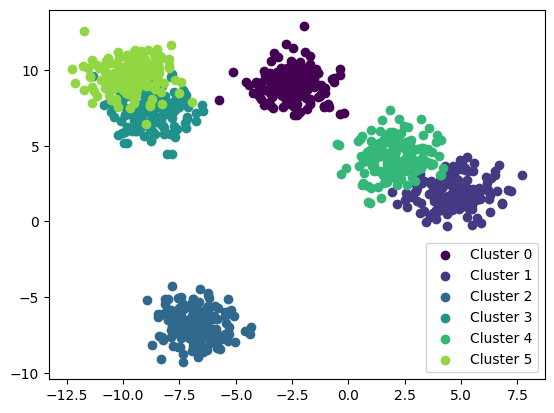

In [117]:
plot_clusters(X, y)

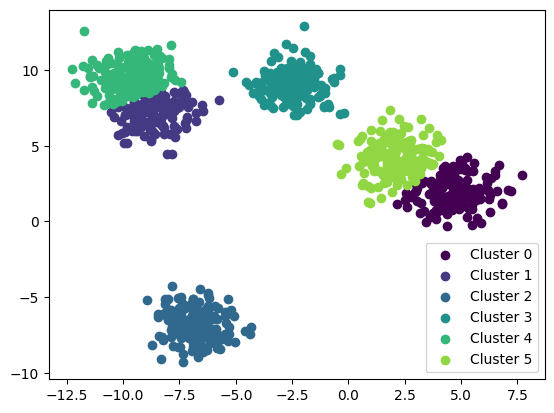

In [118]:
# применяем разные методы кластеризации
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10).fit(X)
plot_clusters(X, kmeans.labels_)

In [119]:
print("KMeans Silhouette Score: ", metrics.silhouette_score(X, kmeans.labels_))
print("KMeans Adjusted Rand Index : ", metrics.adjusted_rand_score(y, kmeans.labels_))
print("KMeans Calinski-Harabasz Index: ", metrics.calinski_harabasz_score(X, kmeans.labels_))
print("KMeans Davies-Bouldin Index: ", metrics.davies_bouldin_score(X, kmeans.labels_))

KMeans Silhouette Score:  0.5848791209279587
KMeans Adjusted Rand Index :  0.8833695225329178
KMeans Calinski-Harabasz Index:  6706.5425034475165
KMeans Davies-Bouldin Index:  0.6153033997493069


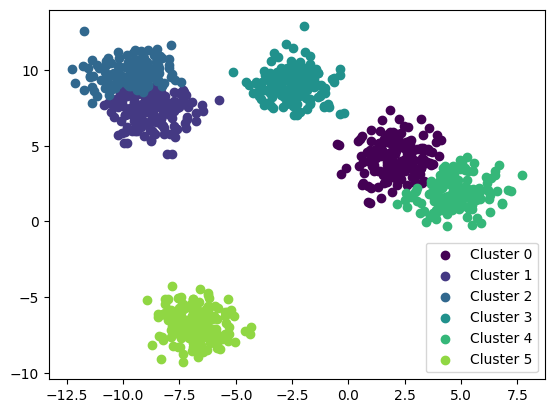

In [120]:
agglo = AgglomerativeClustering(n_clusters=6).fit(X)
plot_clusters(X, agglo.labels_)

In [121]:
print("Agglomerative Clustering Silhouette Score: ", silhouette_score(X, agglo.labels_))
print("Agglomerative Clustering Adjusted Rand Index : ", metrics.adjusted_rand_score(y, agglo.labels_))
print("Agglomerative Clustering Calinski-Harabasz Index: ", metrics.calinski_harabasz_score(X, agglo.labels_))
print("Agglomerative Clustering Davies-Bouldin Index: ", metrics.davies_bouldin_score(X, agglo.labels_))

Agglomerative Clustering Silhouette Score:  0.5740669745249655
Agglomerative Clustering Adjusted Rand Index :  0.8676093657611998
Agglomerative Clustering Calinski-Harabasz Index:  6585.3239929540905
Agglomerative Clustering Davies-Bouldin Index:  0.6291238361421195


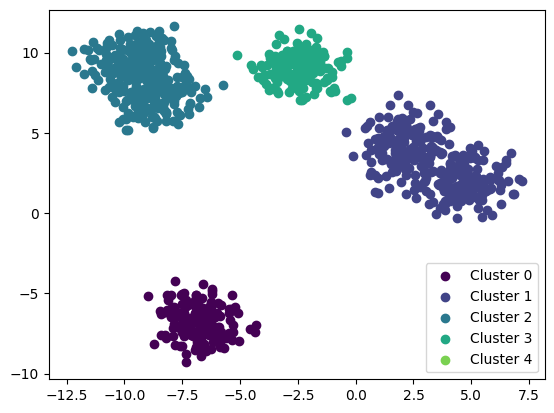

In [122]:
dbscan = DBSCAN(eps=0.9, min_samples=6).fit(X)
plot_clusters(X, dbscan.labels_)

In [116]:
print("DBSCAN Silhouette Score: ", silhouette_score(X, dbscan.labels_))
print("DBSCAN Clustering Adjusted Rand Index : ", metrics.adjusted_rand_score(y, dbscan.labels_))
print("DBSCAN Clustering Calinski-Harabasz Index: ", metrics.calinski_harabasz_score(X, dbscan.labels_))
print("DBSCAN Clustering Davies-Bouldin Index: ", metrics.davies_bouldin_score(X, dbscan.labels_))

DBSCAN Silhouette Score:  0.700451002244491
DBSCAN Clustering Adjusted Rand Index :  0.6749982009809229
DBSCAN Clustering Calinski-Harabasz Index:  3733.371618547693
DBSCAN Clustering Davies-Bouldin Index:  1.5912648905306297


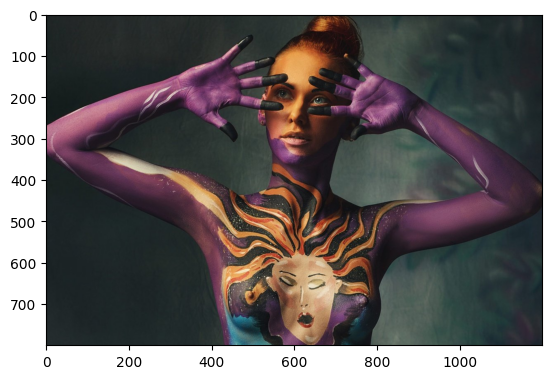

In [178]:
img = plt.imread('image.png')
plt.imshow(img)

In [179]:
w, h, d = tuple(img.shape)
image_array = np.reshape(img, (w*h, d))
image_array

array([[0.12941177, 0.15294118, 0.15294118],
       [0.12941177, 0.15294118, 0.15294118],
       [0.1254902 , 0.14901961, 0.14901961],
       ...,
       [0.12941177, 0.15686275, 0.18039216],
       [0.12941177, 0.15686275, 0.18039216],
       [0.12941177, 0.15686275, 0.18039216]], dtype=float32)

In [180]:
image_array_sample = shuffle(image_array, random_state=42)[:1000]

In [181]:
best_dbn_n = 2
max_score = 0
for n_clusters in range(2,100):
    kmeans = KMeans(n_clusters, random_state=42, n_init=10).fit(image_array_sample)
    score = metrics.davies_bouldin_score(image_array_sample, kmeans.labels_)
    if score > max_score:
        best_dbn_n = n_clusters
        max_score = score
print("Best number of n_clusters: ", best_dbn_n)

Best number of n_clusters:  6


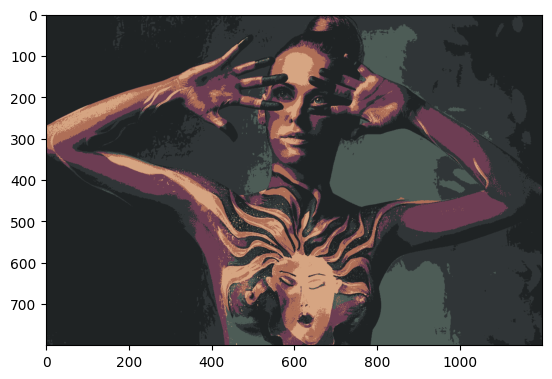

In [182]:
kmeans = KMeans(n_clusters=best_dbn_n, random_state=42, n_init=10).fit(image_array_sample)
compressed_palette = kmeans.cluster_centers_
labels = kmeans.predict(image_array)
dithered = compressed_palette[labels]
dithered = np.reshape(dithered, (w, h, d))
plt.imshow(dithered)

In [183]:
print("KMeans Silhouette Score: ", metrics.silhouette_score(image_array_sample, kmeans.labels_))
print("KMeans Calinski-Harabasz Index: ", metrics.calinski_harabasz_score(image_array_sample, kmeans.labels_))
print("KMeans Davies-Bouldin Index: ", metrics.davies_bouldin_score(image_array_sample, kmeans.labels_))

KMeans Silhouette Score:  0.42585927
KMeans Calinski-Harabasz Index:  1703.0350305037935
KMeans Davies-Bouldin Index:  0.9311273000186806


In [184]:
best_sil_n = 2
max_score = 0
for n_clusters in range(2,100):
    kmeans = KMeans(n_clusters, random_state=42, n_init=10).fit(image_array_sample)
    score =  metrics.silhouette_score(image_array_sample, kmeans.labels_)
    if score > max_score:
        best_sil_n = n_clusters
        max_score = score
print("Best number of n_clusters: ", best_sil_n)

Best number of n_clusters:  2


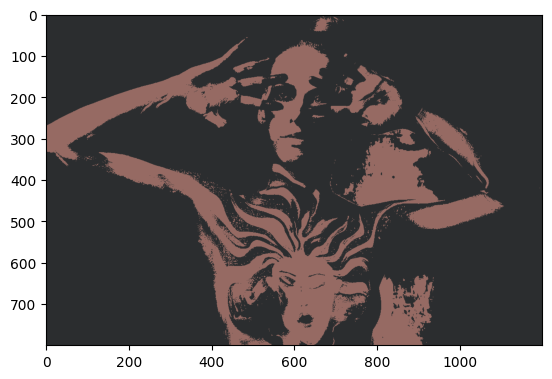

In [185]:
kmeans = KMeans(n_clusters=best_sil_n, random_state=42, n_init=10).fit(image_array_sample)
compressed_palette = kmeans.cluster_centers_
labels = kmeans.predict(image_array)
dithered = compressed_palette[labels]
dithered = np.reshape(dithered, (w, h, d))
plt.imshow(dithered)

In [186]:
print("KMeans Silhouette Score: ", metrics.silhouette_score(image_array_sample, kmeans.labels_))
print("KMeans Calinski-Harabasz Index: ", metrics.calinski_harabasz_score(image_array_sample, kmeans.labels_))
print("KMeans Davies-Bouldin Index: ", metrics.davies_bouldin_score(image_array_sample, kmeans.labels_))

KMeans Silhouette Score:  0.650159
KMeans Calinski-Harabasz Index:  1799.179170188591
KMeans Davies-Bouldin Index:  0.6554836144947856


In [187]:
best_ch_n = 2
max_score = 0
for n_clusters in range(2,100):
    kmeans = KMeans(n_clusters, random_state=42, n_init=10).fit(image_array_sample)
    score =  metrics.calinski_harabasz_score(image_array_sample, kmeans.labels_)
    if score > max_score:
        best_ch_n = n_clusters
        max_score = score
print("Best number of n_clusters: ", best_ch_n)

Best number of n_clusters:  3


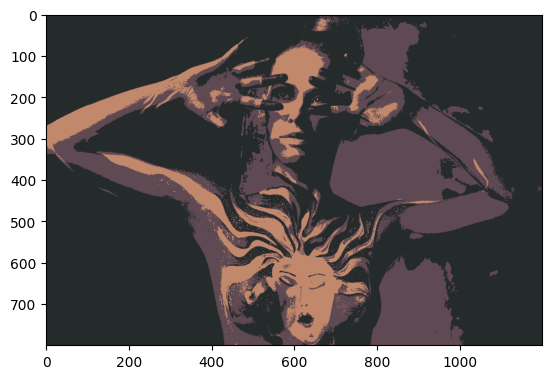

In [188]:
kmeans = KMeans(n_clusters=best_ch_n, random_state=42, n_init=10).fit(image_array_sample)
compressed_palette = kmeans.cluster_centers_
labels = kmeans.predict(image_array)
dithered = compressed_palette[labels]
dithered = np.reshape(dithered, (w, h, d))
plt.imshow(dithered)

In [189]:
print("KMeans Silhouette Score: ", metrics.silhouette_score(image_array_sample, kmeans.labels_))
print("KMeans Calinski-Harabasz Index: ", metrics.calinski_harabasz_score(image_array_sample, kmeans.labels_))
print("KMeans Davies-Bouldin Index: ", metrics.davies_bouldin_score(image_array_sample, kmeans.labels_))

KMeans Silhouette Score:  0.59206784
KMeans Calinski-Harabasz Index:  2125.2815018237775
KMeans Davies-Bouldin Index:  0.6957471471904838
